In [2]:
import sys

sys.path.append('/home/jovyan/work')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pandas as pd

In [14]:
from helpers.vars import DATA_PATH, RES_PATH, PRE_PATH
from helpers.files import load_interventions, load_from_pickle
from helpers.plot import plot_main_intro_figure, plot_covid_ratio
from helpers.analysis import compute_covidratio

In [5]:
interventions = load_interventions(f'{DATA_PATH}/interventions.csv')

In [9]:
agg = pd.read_csv(f'{RES_PATH}/aggregated.tsv.gz', sep='\t')

agg_dict = {}
codes = agg.code.unique()
for c in codes:
    agg_dict[c] = agg[agg.code==c].copy()
    agg_dict[c]['date'] = agg_dict[c]['date'].apply(lambda d: pd.to_datetime(d, format='%Y-%m-%d'))
    agg_dict[c] = agg_dict[c].set_index('date')
agg

,date,covid,user_kind,count,rev_len_sum,actor_user,edit_1,edit_5,revision_is_identity_reverted,revision_is_identity_revert,code
0,2018-01-01,False,account,71799,1.929916e+09,4178.0,1297.0,348.0,6011,6683,en
1,2018-01-01,False,anonymous,23740,7.026144e+08,0.0,0.0,0.0,7155,1083,en
2,2018-01-01,False,bot,7196,1.487072e+08,0.0,0.0,0.0,257,627,en
3,2018-01-01,True,account,4,1.942120e+05,4178.0,1297.0,348.0,6011,6683,en
4,2018-01-02,False,account,81001,1.992566e+09,5155.0,1905.0,485.0,6355,7728,en
...,...,...,...,...,...,...,...,...,...,...,...
45917,2020-11-30,True,account,1,1.020430e+05,16.0,12.0,2.0,5,29,da
45918,2020-12-01,False,account,307,3.912818e+06,10.0,12.0,2.0,19,35,da
45919,2020-12-01,False,anonymous,134,1.528426e+06,0.0,0.0,0.0,44,11,da
45920,2020-12-01,False,bot,2,1.804700e+04,0.0,0.0,0.0,0,0,da


In [10]:
large_wikis = ['en', 'fr', 'de', 'it']
medium_wikis = ['ja', 'sv', 'nl', 'ko']
small_wikis = ['sr', 'no', 'fi', 'da']

# Main Figure

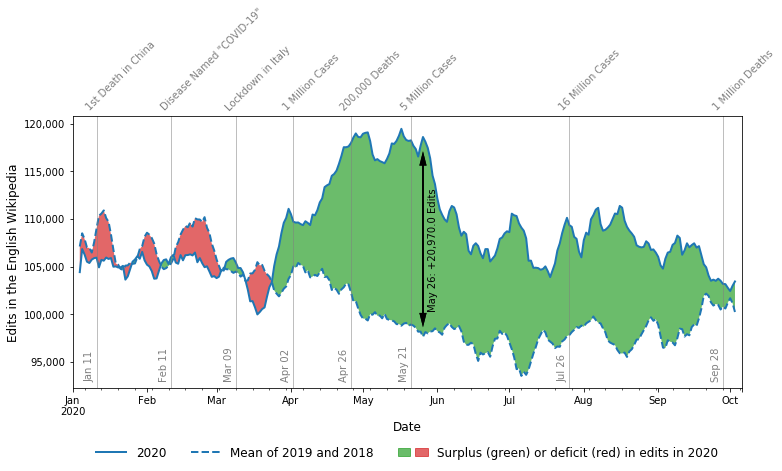

In [12]:
fig_main = plot_main_intro_figure(agg, 'en', years_merge=True)
fig_main.savefig('../img/intro_fig_final_avg.pdf', bbox_inches='tight')

# COVID-19-Edits and Visualization

In [16]:
dict_articles = load_from_pickle(f'{PRE_PATH}/dict_edits_bytitle_covid.pkl')

In [17]:
# calc covid ratio by edits and articles (see code)
dict_covid_ratio = compute_covidratio(dict_articles)

In [18]:
# show covid edits
dict_covid_ratio['en'][0]

,covid_edits,covid_articles,noncovid_edits,noncovid_articles,ratio_covid_edits,ratio_covid_articles,date_str
date,,,,,,,
20200101,1,1,116861,77501,0.000009,0.000013,20200101
20200102,2,2,132814,88150,0.000015,0.000023,20200102
20200103,1,1,145005,97912,0.000007,0.000010,20200103
20200104,2,2,134822,91197,0.000015,0.000022,20200104
20200105,6,2,145795,99528,0.000041,0.000020,20200105
...,...,...,...,...,...,...,...
20200926,385,164,109238,64926,0.003512,0.002520,20200926
20200927,366,152,118070,71147,0.003090,0.002132,20200927
20200928,492,190,112060,65837,0.004371,0.002878,20200928


======== en:
Max Edit ratio aimed towards Covid articles:  0.04436485367697347
Max ratio of edited articles which are Covid:  0.005886330802569699
======== fr:
Max Edit ratio aimed towards Covid articles:  0.034417369868208966
Max ratio of edited articles which are Covid:  0.0033343918704350586
======== de:
Max Edit ratio aimed towards Covid articles:  0.16996323358309676
Max ratio of edited articles which are Covid:  0.007152522714092403
======== it:
Max Edit ratio aimed towards Covid articles:  0.017838655729871783
Max ratio of edited articles which are Covid:  0.004501688133049893
======== ja:
Max Edit ratio aimed towards Covid articles:  0.014890771288452965
Max ratio of edited articles which are Covid:  0.003657545380655649
======== sv:
Max Edit ratio aimed towards Covid articles:  0.03989844033369604
Max ratio of edited articles which are Covid:  0.004901960784313725
======== nl:
Max Edit ratio aimed towards Covid articles:  0.04234866199012731
Max ratio of edited articles which 

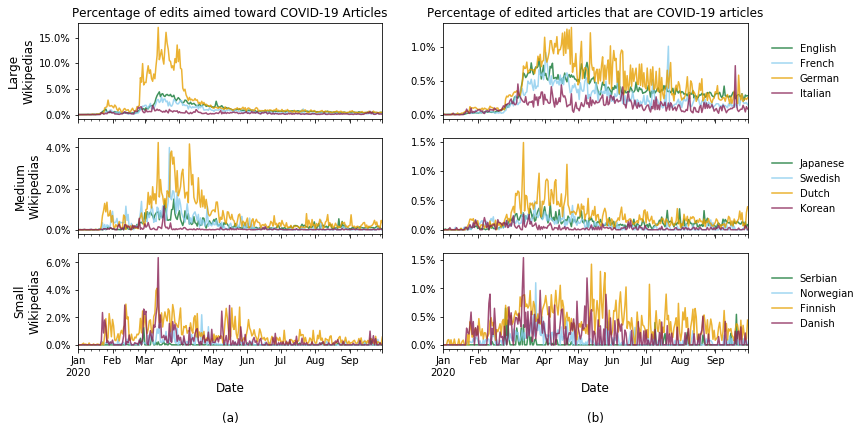

In [19]:
fig_covid = plot_covid_ratio(dict_covid_ratio, large_wikis, medium_wikis, small_wikis)
fig_covid.savefig('../img/percentage_covid_edits.pdf', bbox_inches='tight')